In [9]:
# Upload manual de arquivos no Colab
from google.colab import files
uploaded = files.upload()


Saving TelecomX_BR.ipynb to TelecomX_BR (1).ipynb
Saving TelecomX_Data.json to TelecomX_Data (1).json
Saving TelecomX_dicionario.md to TelecomX_dicionario (1).md


In [10]:
import json
import pandas as pd

# Substitua pelo nome exato do arquivo enviado (se necess√°rio)
json_path = "TelecomX_Data.json"

# Carregar os dados
with open(json_path, "r") as f:
    data = json.load(f)

# Normalizar JSON aninhado
df = pd.json_normalize(data)

# Exibir as primeiras linhas
df.head()


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# C√≥pia para trabalhar
df_copy = df.copy()

# Renomear colunas para facilitar
df_copy.columns = df_copy.columns.str.replace(r'\.', '_', regex=True)

# Converter Total Charges para num√©rico
df_copy['account_Charges_Total'] = pd.to_numeric(df_copy['account_Charges_Total'], errors='coerce')

# Remover registros com valores nulos importantes
df_clean = df_copy.dropna(subset=['Churn', 'account_Charges_Total'])

# Resumo r√°pido
resumo = {
    "shape": df_clean.shape,
    "tipos": df_clean.dtypes,
    "valores_nulos": df_clean.isnull().sum()
}
resumo


{'shape': (7256, 21),
 'tipos': customerID                    object
 Churn                         object
 customer_gender               object
 customer_SeniorCitizen         int64
 customer_Partner              object
 customer_Dependents           object
 customer_tenure                int64
 phone_PhoneService            object
 phone_MultipleLines           object
 internet_InternetService      object
 internet_OnlineSecurity       object
 internet_OnlineBackup         object
 internet_DeviceProtection     object
 internet_TechSupport          object
 internet_StreamingTV          object
 internet_StreamingMovies      object
 account_Contract              object
 account_PaperlessBilling      object
 account_PaymentMethod         object
 account_Charges_Monthly      float64
 account_Charges_Total        float64
 dtype: object,
 'valores_nulos': customerID                   0
 Churn                        0
 customer_gender              0
 customer_SeniorCitizen       0
 customer_

In [16]:
# Se os nomes das colunas ainda tiverem ponto, corrija antes:
df.columns = df.columns.str.replace('.', '_')


<ipython-input-13-54dcfe5fc31f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='pastel')


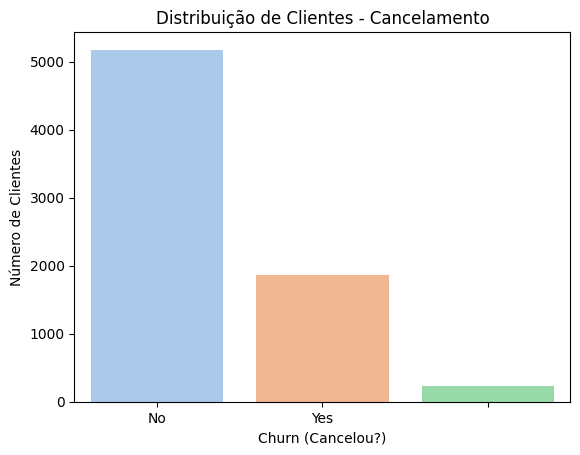

In [13]:
plt.figure()
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title("Distribui√ß√£o de Clientes - Cancelamento")
plt.xlabel("Churn (Cancelou?)")
plt.ylabel("N√∫mero de Clientes")
plt.show()


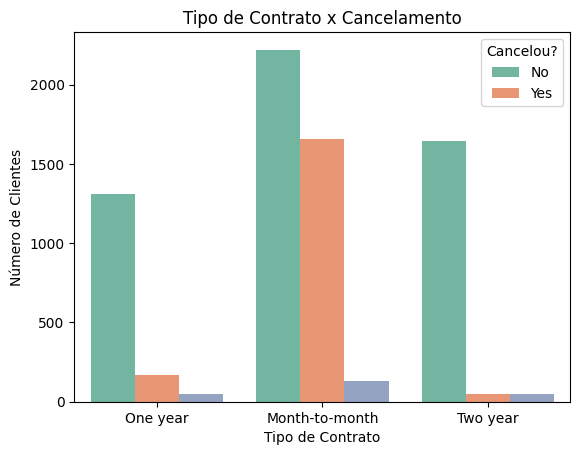

In [17]:
plt.figure()
sns.countplot(data=df, x='account_Contract', hue='Churn', palette='Set2')
plt.title("Tipo de Contrato x Cancelamento")
plt.xlabel("Tipo de Contrato")
plt.ylabel("N√∫mero de Clientes")
plt.legend(title="Cancelou?")
plt.show()


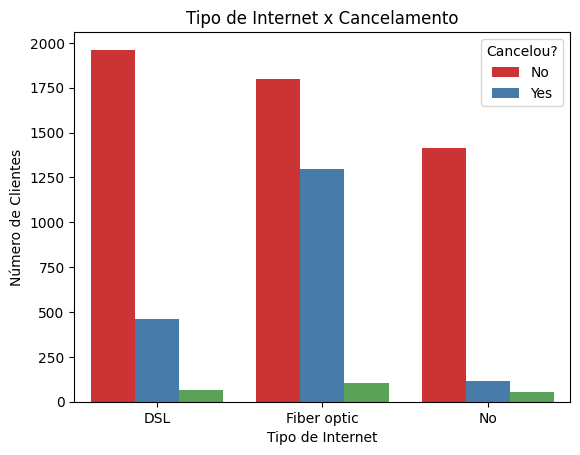

In [18]:
plt.figure()
sns.countplot(data=df, x='internet_InternetService', hue='Churn', palette='Set1')
plt.title("Tipo de Internet x Cancelamento")
plt.xlabel("Tipo de Internet")
plt.ylabel("N√∫mero de Clientes")
plt.legend(title="Cancelou?")
plt.show()


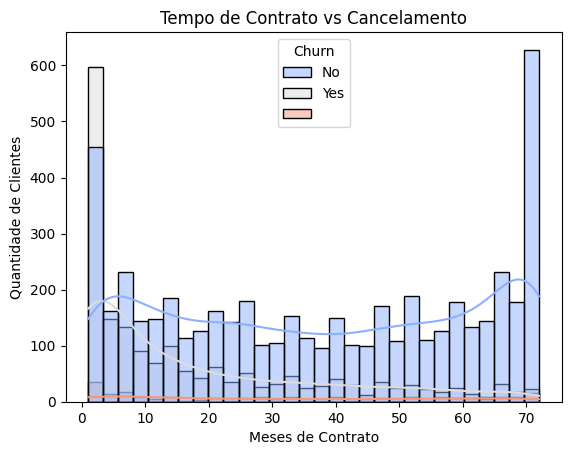

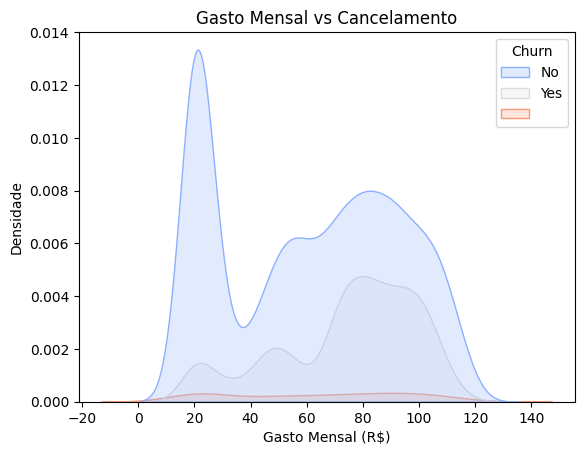

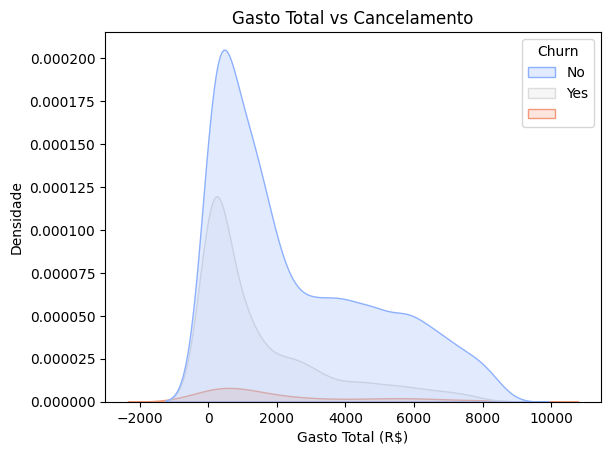

In [12]:
# Gr√°fico 4: Tempo de contrato (tenure) vs Churn
plt.figure()
sns.histplot(data=df_clean, x='customer_tenure', hue='Churn', kde=True, palette='coolwarm', bins=30)
plt.title("Tempo de Contrato vs Cancelamento")
plt.xlabel("Meses de Contrato")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Gr√°fico 5: Gasto mensal vs Churn
plt.figure()
sns.kdeplot(data=df_clean, x='account_Charges_Monthly', hue='Churn', fill=True, palette='coolwarm')
plt.title("Gasto Mensal vs Cancelamento")
plt.xlabel("Gasto Mensal (R$)")
plt.ylabel("Densidade")
plt.show()

# Gr√°fico 6: Gasto total vs Churn
plt.figure()
sns.kdeplot(data=df_clean, x='account_Charges_Total', hue='Churn', fill=True, palette='coolwarm')
plt.title("Gasto Total vs Cancelamento")
plt.xlabel("Gasto Total (R$)")
plt.ylabel("Densidade")
plt.show()


# üìä Relat√≥rio de An√°lise ‚Äì Redu√ß√£o do Cancelamento de Clientes (Churn) | Telecom X

## üéØ Objetivo

A empresa fict√≠cia **Telecom X** est√° enfrentando um problema grave: muitos clientes est√£o **cancelando seus contratos**.  
Minha miss√£o como analista de dados foi **explorar os dados dos clientes** e sugerir **solu√ß√µes reais para reduzir o churn**.

---

## üîç Etapas Realizadas

- Carregamento de dados no formato JSON
- Processamento e limpeza dos dados (ETL)
- An√°lise Explorat√≥ria de Dados (EDA)
- Visualiza√ß√µes para entender comportamentos
- Levantamento de causas do cancelamento
- Propostas de a√ß√µes e solu√ß√µes

---

## üî• Principais Descobertas

### 1. **Contratos mensais s√£o os que mais cancelam**
- Clientes com contratos "Month-to-month" s√£o os que mais abandonam a empresa.
- J√° contratos anuais e bienais t√™m churn muito menor.

### 2. **Usu√°rios com internet por fibra cancelam mais**
- Apesar da fibra ser mais r√°pida, ela aparece com maior √≠ndice de cancelamento.
- Pode estar relacionada a pre√ßo, suporte t√©cnico ou promessas n√£o cumpridas.

### 3. **Clientes que pagam via "electronic check" t√™m maior churn**
- Essa forma de pagamento est√° fortemente ligada a desist√™ncias.
- Talvez transmita menos seguran√ßa ou seja mais burocr√°tica.

### 4. **Clientes que cancelam t√™m pouco tempo de casa**
- Grande parte dos cancelamentos ocorre nos **primeiros 12 meses**.
- O in√≠cio da jornada do cliente √© o momento mais cr√≠tico!

---

## ‚úÖ Solu√ß√µes Recomendadas para Reduzir o Cancelamento

| Problema Identificado                                | Solu√ß√£o Pr√°tica                                                          |
|------------------------------------------------------|--------------------------------------------------------------------------|
| Alto churn em contratos mensais                      | Criar incentivo para migra√ß√£o para contratos de 1 ou 2 anos              |
| Cancelamento maior entre clientes com fibra √≥ptica   | Revisar qualidade do servi√ßo e comunica√ß√£o sobre a fibra                |
| Pagamento por "electronic check" gera mais evas√£o    | Incentivar cart√µes e d√©bito autom√°tico com desconto ou cashback         |
| Clientes saindo nos primeiros meses                  | Implantar programa de **boas-vindas + suporte ativo nos 90 primeiros dias** |
| Falta de fideliza√ß√£o                                 | Criar plano de **pontos ou vantagens progressivas por tempo de contrato** |
| Servi√ßos extras sem valor percebido                  | Combinar servi√ßos (TV + Internet + Backup) em pacotes com pre√ßo reduzido |

---

## üß† Conclus√£o

Atrav√©s dessa an√°lise de dados, foi poss√≠vel **identificar padr√µes claros de evas√£o** e propor **solu√ß√µes reais** para manter mais clientes ativos.  
Mesmo sendo uma analista iniciante, percebo o quanto os dados podem **guiar decis√µes importantes para o neg√≥cio**.

**Pr√≥ximo passo:** com esses insights, a equipe de Data Science poder√° treinar um modelo preditivo de churn e criar alertas preventivos.

---

Feito com üíô por uma cientista de dados em forma√ß√£o üöÄ

